In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from matplotlib.colors import LinearSegmentedColormap
import allel

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## load samples

In [14]:
def load_groupfile(groupfile):
    group_ordered = []
    samples_queried = []
    haps_queried = []
    group2haps = defaultdict(list)
    hap2group = {}
    group2samples = defaultdict(list)
    with open(groupfile) as f:
        for line in f:
            sample, group = line.strip().split()
            if group not in group_ordered:
                group_ordered.append(group)  
            samples_queried.append(sample)
            group2samples[group].append(sample)
            # haps_queried.append(f'{sample}_1')
            # haps_queried.append(f'{sample}_2')
            group2haps[group].append(f'{sample}_1')
            group2haps[group].append(f'{sample}_2')
            hap2group[f'{sample}_1'] = group
            hap2group[f'{sample}_2'] = group
    return samples_queried, group_ordered, group2haps, hap2group, group2samples

In [15]:
groupfile = '500_sample2breed.tsv'

In [16]:
samples_queried, group_ordered, group2haps, hap2group, group2samples = load_groupfile(groupfile)

In [17]:
for group, ls in group2samples.items(): 
    print(group, len(ls))

Angus 100
Hereford 100
Charolais 100
Simmental 100
Limousin 100


## load vcf files

In [18]:
vcffile='./Chr6_37180233_37768454_500_beef_samples_SNP-INDEL.vcf.gz'

In [19]:
callset = allel.read_vcf(
    vcffile, 
    # region=f'{chrom}:{start}-{end}', 
    # samples=samples_queried, 
    fields=['samples', 'calldata/GT', 'variants/POS', 'variants/ALT', 'variants/REF'], 
    alt_number=1,
    tabix='~/software/htslib-1.18/tabix'
)

## split genotype to haplotype

In [20]:
num_sites, num_inds, num_ploidy = callset['calldata/GT'].shape

In [21]:
ay_hap = np.empty((num_sites, num_inds * 2))

In [22]:
ay_hap[:, ::2] = callset['calldata/GT'][:, :, 0]
ay_hap[:, 1::2] = callset['calldata/GT'][:, :, 1]

## load haplotype array to dataframe

In [23]:
haps_queried = []
for sample in callset['samples']:
    haps_queried.extend([f'{sample}_1', f'{sample}_2'])

In [24]:
df_hap = pd.DataFrame(
    data=ay_hap, 
    index=callset['variants/POS'], 
    columns=haps_queried,
    dtype=int
)

In [25]:
df_hap

,AANUSAM000004285114_1,AANUSAM000004285114_2,AANNZLM016932004379_1,AANNZLM016932004379_2,AANUSAMCSU20122222_1,AANUSAMCSU20122222_2,AANUSAMCSU20122385_1,AANUSAMCSU20122385_2,AANUSAMCSU20144019_1,AANUSAMCSU20144019_2,...,SIMDEUM000937747659_1,SIMDEUM000937747659_2,SIMDEUM000950584736_1,SIMDEUM000950584736_2,SIMDEUM000939109211_1,SIMDEUM000939109211_2,SIMDEUM000812666322_1,SIMDEUM000812666322_2,SIMDEUM000937732019_1,SIMDEUM000937732019_2
37180381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37180411,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37180475,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
37180599,1,1,0,0,0,1,1,0,1,0,...,0,0,1,1,1,0,0,0,1,0
37180860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37768116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37768154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37768213,1,1,0,0,0,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
37768214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4 breed

In [26]:
ls_haps_4breed = []
with open('./4_breed.txt', 'r') as f_in:
    for line in f_in:
        sample = line.strip()
        ls_haps_4breed.extend([f'{sample}_1', f'{sample}_2'])

In [27]:
len(ls_haps_4breed)

800

In [28]:
df_hap_4breed = df_hap[ls_haps_4breed]

In [29]:
df_hap_4breed

,CHAFRAF007931680136_1,CHAFRAF007931680136_2,CHAUSAM00000M434790_1,CHAUSAM00000M434790_2,CHAUSAM00000M411450_1,CHAUSAM00000M411450_2,CHAUSAM00000M319454_1,CHAUSAM00000M319454_2,CHACHEF120150617711_1,CHACHEF120150617711_2,...,UMCUSAM000000198530_1,UMCUSAM000000198530_2,HERCANM000C02755740_1,HERCANM000C02755740_2,HERAUSUBOW00000C017_1,HERAUSUBOW00000C017_2,UMCUSAM000000204590_1,UMCUSAM000000204590_2,HERUSAM000022957495_1,HERUSAM000022957495_2
37180381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37180411,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
37180475,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37180599,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37180860,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37768116,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37768154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37768213,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37768214,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
ls_5_shared_snp = [37349373, 37362802, 37381106, 37381397, 37438248]

In [31]:
df_hap_4breed.loc[ls_5_shared_snp,:]

,CHAFRAF007931680136_1,CHAFRAF007931680136_2,CHAUSAM00000M434790_1,CHAUSAM00000M434790_2,CHAUSAM00000M411450_1,CHAUSAM00000M411450_2,CHAUSAM00000M319454_1,CHAUSAM00000M319454_2,CHACHEF120150617711_1,CHACHEF120150617711_2,...,UMCUSAM000000198530_1,UMCUSAM000000198530_2,HERCANM000C02755740_1,HERCANM000C02755740_2,HERAUSUBOW00000C017_1,HERAUSUBOW00000C017_2,UMCUSAM000000204590_1,UMCUSAM000000204590_2,HERUSAM000022957495_1,HERUSAM000022957495_2
37349373,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
37362802,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
37381106,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
37381397,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,1,0,0,0,0,0
37438248,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [32]:
ls_all_0 = []
ls_all_1 = []

In [33]:
for hap in ls_haps_4breed:
    if df_hap_4breed.loc[ls_5_shared_snp,hap].sum() == 0:
        ls_all_0.append(hap)
    elif df_hap_4breed.loc[ls_5_shared_snp,hap].sum() == 5:
        ls_all_1.append(hap)

In [34]:
print(len(ls_all_0), len(ls_all_1))

425 315


In [35]:
ls_all_1_0 = ls_all_1 + ls_all_0

In [36]:
len(ls_all_1_0)

740

In [37]:
ls_keep_site = [True if 37349373 <= pos <= 37438248 else False for pos in df_hap_4breed.index]

In [38]:
df_hap_region = df_hap_4breed.loc[ls_keep_site, ls_all_1_0]

In [39]:
df_hap_region

,CHAFRAF007931680136_1,CHAFRAF007931680136_2,CHAUSAM00000M434790_1,CHAUSAM00000M434790_2,CHAUSAM00000M411450_1,CHAUSAM00000M411450_2,CHAUSAM00000M319454_2,CHACHEF120150617711_1,CHACHEF120150617711_2,UMCUSAU000000194761_1,...,HERNZLM000216000219_1,HERNZLM000216000219_2,UMCUSAM000000198530_1,UMCUSAM000000198530_2,HERCANM000C02755740_1,HERCANM000C02755740_2,UMCUSAM000000204590_1,UMCUSAM000000204590_2,HERUSAM000022957495_1,HERUSAM000022957495_2
37349373,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
37349432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37349508,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,0,0,0,0,0
37349570,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,0,0,0,0,0
37349571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37437563,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
37437568,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
37437628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37438222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### plot breed

In [40]:
keep_mac = [
    True if 0 < ac < df_hap_region.shape[1] else False for ac in df_hap_region.sum(axis=1)
]

In [41]:
np.sum(keep_mac)

679

In [42]:
df_hap_region_mac = df_hap_region.loc[keep_mac, :]

In [43]:
df_hap_region_mac

,CHAFRAF007931680136_1,CHAFRAF007931680136_2,CHAUSAM00000M434790_1,CHAUSAM00000M434790_2,CHAUSAM00000M411450_1,CHAUSAM00000M411450_2,CHAUSAM00000M319454_2,CHACHEF120150617711_1,CHACHEF120150617711_2,UMCUSAU000000194761_1,...,HERNZLM000216000219_1,HERNZLM000216000219_2,UMCUSAM000000198530_1,UMCUSAM000000198530_2,HERCANM000C02755740_1,HERCANM000C02755740_2,UMCUSAM000000204590_1,UMCUSAM000000204590_2,HERUSAM000022957495_1,HERUSAM000022957495_2
37349373,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
37349432,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37349508,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,0,0,0,0,0
37349570,1,1,1,1,1,1,1,1,1,1,...,0,0,0,1,1,0,0,0,0,0
37349571,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37437563,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,0,0
37437568,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
37437628,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37438222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
group2color = {
    'Angus': '#e6194B',
    'Hereford': '#3cb44b',
    'Charolais': '#ffe119',
    'Limousin': '#4363d8',
    'Simmental': '#f58231',
}

In [45]:
df_hap_region_mac_t = df_hap_region_mac.T

In [46]:
hap2color = pd.Series({hap: group2color[hap2group[hap]] for hap in df_hap_region_mac_t.index})

In [47]:
myColors = ((179/255, 179/255, 179/255, 1.0), (255/255, 247/255, 236/255, 1.0),  (127/255, 0, 0, 1.0))
cmap = LinearSegmentedColormap.from_list('Custom', myColors, len(myColors))

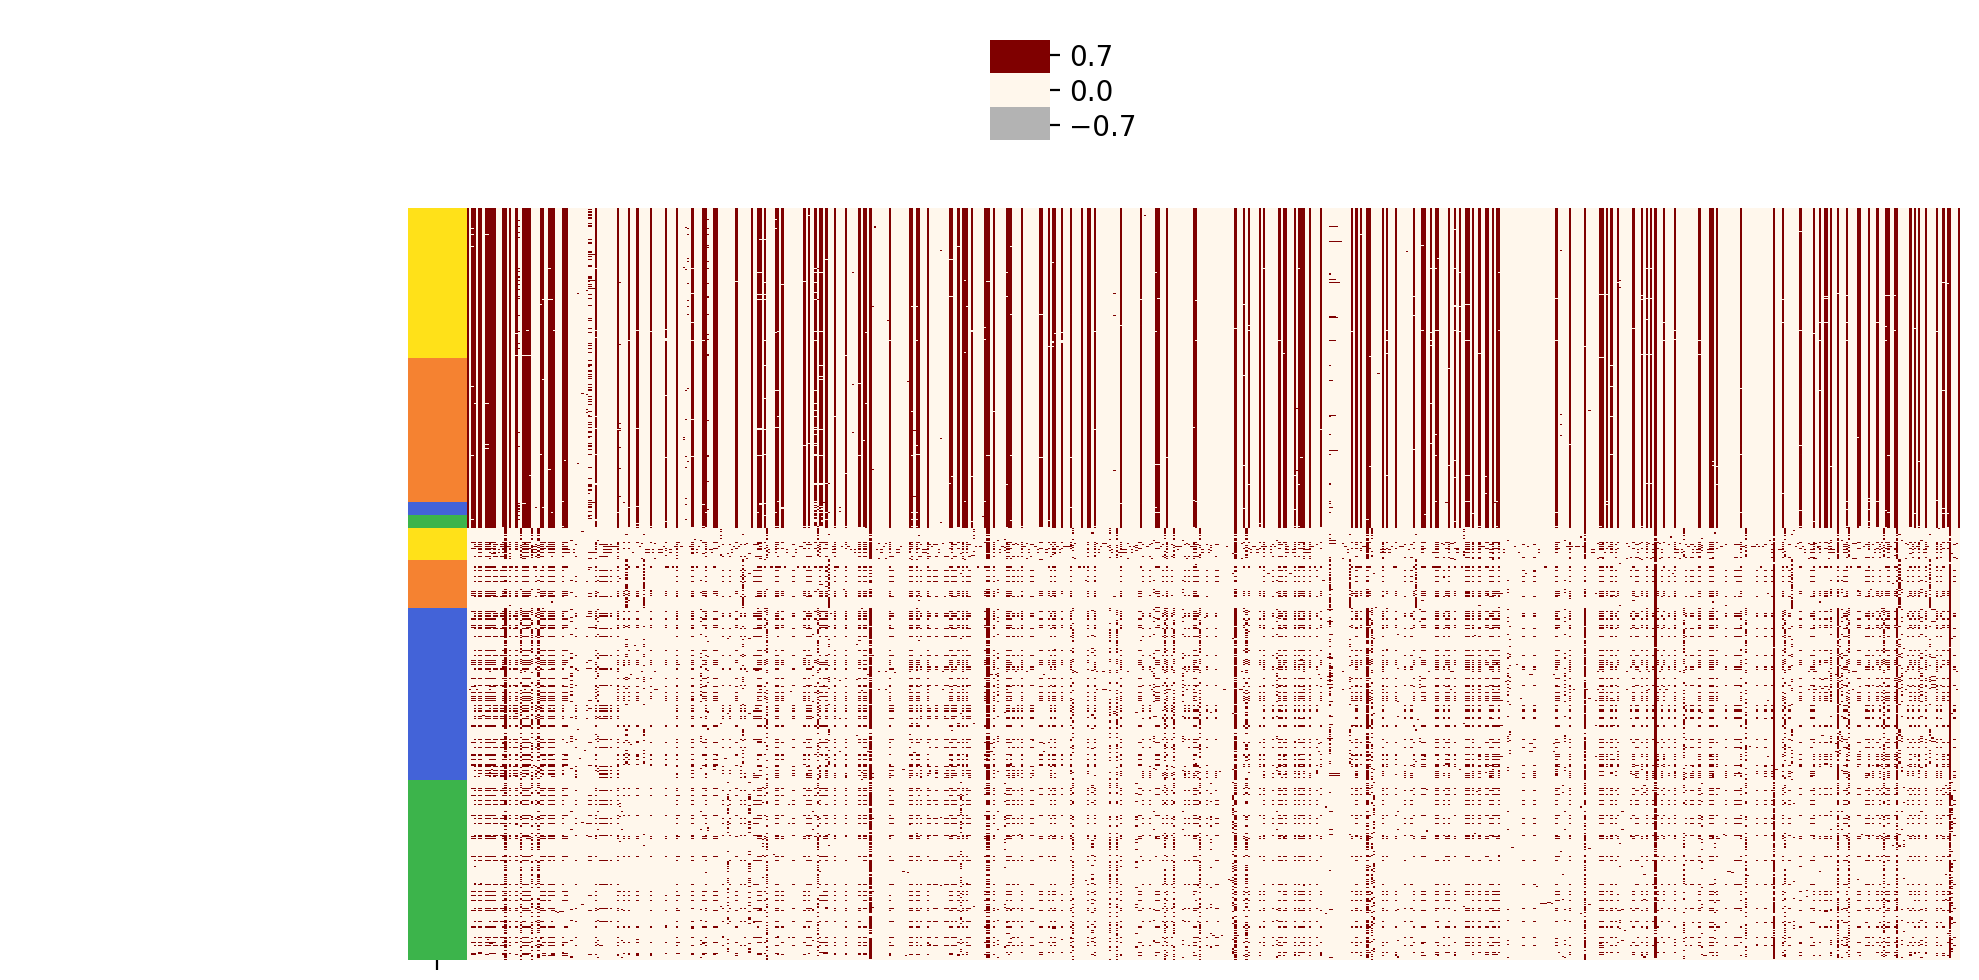

In [53]:
g = sns.clustermap(
    df_hap_region_mac_t, 
    row_cluster=False, 
    col_cluster=False, 
    yticklabels=False, 
    xticklabels=False, #添加选项，是否显示xtick
    cmap=cmap, 
    row_colors=hap2color,
    vmin=-1, 
    vmax=1, 
    cbar_pos=(0.5, 0.85, 0.03, 0.1),
    cbar_kws={"ticks":[-0.7, 0, 0.7]}, 
    figsize=(10, 5)
)

In [49]:
#创建图例-通过创建不可见条形图创建一个图例
for label, color in group2color.items():
    g.ax_row_dendrogram.bar(0, 0, color=color, label=label, linewidth=0)

In [50]:
g.ax_row_dendrogram.legend(loc='lower left', ncol=3, bbox_to_anchor=(1, 1))
g.cax.set_position(pos=[0.85, 0.805, 0.05, 0.09])

In [51]:
g.cax.set_yticklabels(['Missing', 'Ref allele', 'Alt allele'])

[Text(1, -0.7, 'Missing'),
 Text(1, 0.0, 'Ref allele'),
 Text(1, 0.7, 'Alt allele')]

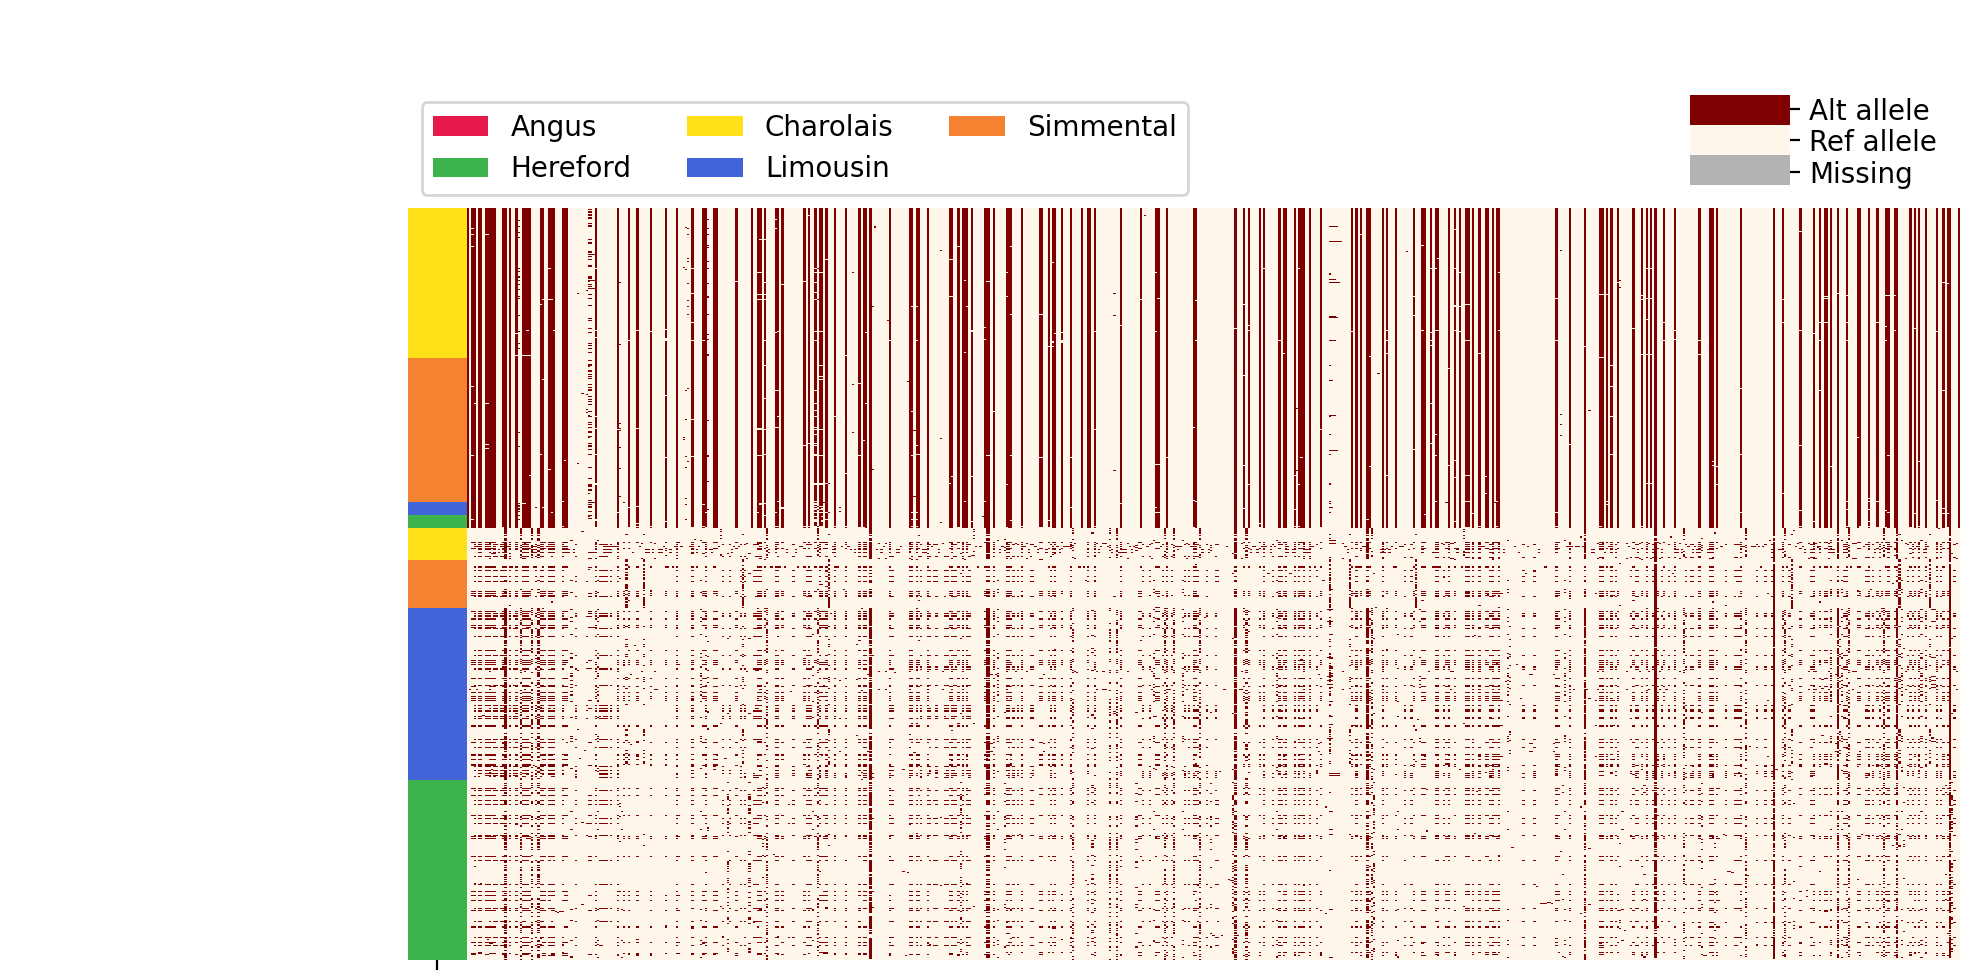

In [52]:
g.figure